# Kaggle Titanic Competitions

#### Source :  https://www.kaggle.com/c/titanic/data

The main libraries i used in this competition are:
- Pandas for data manipulation 
- Matplotlib and Seaborn for data visualization
- Numpy for multidimentional array computing
- Sklearn for machine learning and predictive modeling
    

###  Exploratory Data Analysis :-

In EDA we will be doing mainly these things:
- Data Extraction 
- Data Cleaning
- Plotting
- Assumptions

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png{
   display: table-cell;
   text-align: centre;
   vertical-align: middle;
           }
</style>
""");

Importing useful libraries

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pylab as plot
parms = {
    'axes.labelsize':"large",
    'xtick.labelsize':"x-large",
    'legend.fontsize':20,
    'figure.dpi':150,
    'figure.figsize':[25,8]
        }
plot.rcParams.update(parms)

We have two available datasets one for training purpose and another is testing set to score and generate the output file to submit on the kaggle.
At first lets load the training dataset

In [3]:
train = pd.read_csv("train.csv")

In [4]:
print(train.shape)

(891, 12)


In training dataset we have 891 rows and 12 columns

In [5]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The Survived column is the target variable.
  - Survived = 1, the passenger is survived
  - Survived = 0, the passenger is dead. 
  
This is the variable we are going to Predict.

Remaining variables describe the passengers.

- PassengerId: and id given to each traveler on the boat
- Pclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)
- Name of the passeger
- Sex
- Age
- SibSp: number of siblings and spouses traveling with the passenger
- Parch: number of parents and children traveling with the passenger
- ticket number
- ticket Fare
- cabin number
- embarkation. This describe three possible areas of the Titanic from which the people embark. Three possible values S,C,Q

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

From above it is clear that 177 values are missing in the Age column and 2 values in Embarked column.


One solution is to fill in the null values of Age column with the median age. We could also impute with the mean age but the median is more robust to the outliers.

In [8]:
train['Age'] = train['Age'].fillna(train['Age'].median())

In [9]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64



Here we add the another column named Died in the dataset. 

In [10]:
train['Died']= 1-train['Survived']

Now, visualization of servival based on gender.

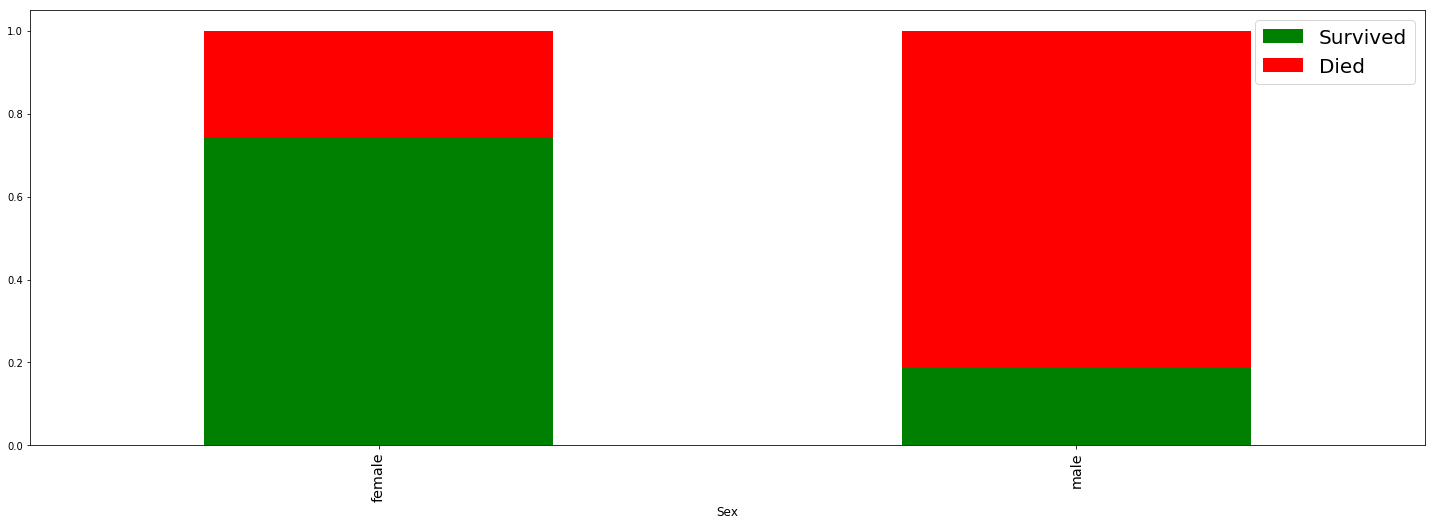

In [11]:
train.groupby('Sex').agg('mean')[['Survived','Died']].plot(kind='bar',figsize=(25,8),stacked=True, colors=['g','r']);

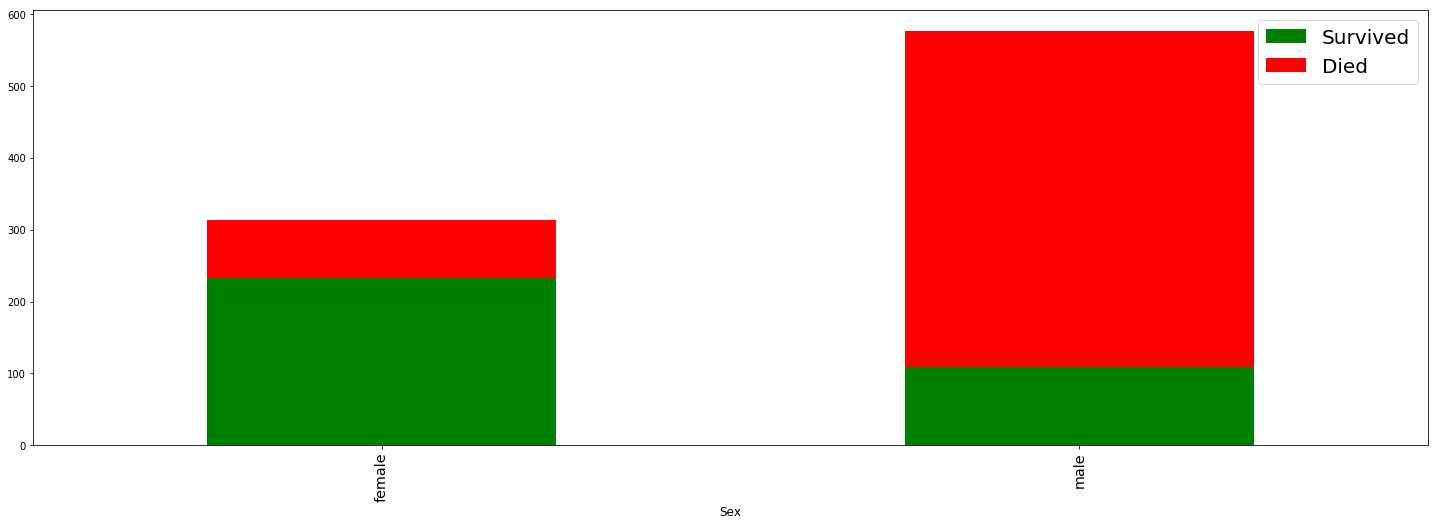

In [12]:
train.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind='bar',figsize=(25,8),stacked=True, colors=['g','r']);

Here Sex variable seems to be a discriminative feature. From the above bar graph it seems that male passengers are more likely to succumbed while on the another hand female are more likely to survive. 

Now, lets visualize the correlation of the survival with the age variable.

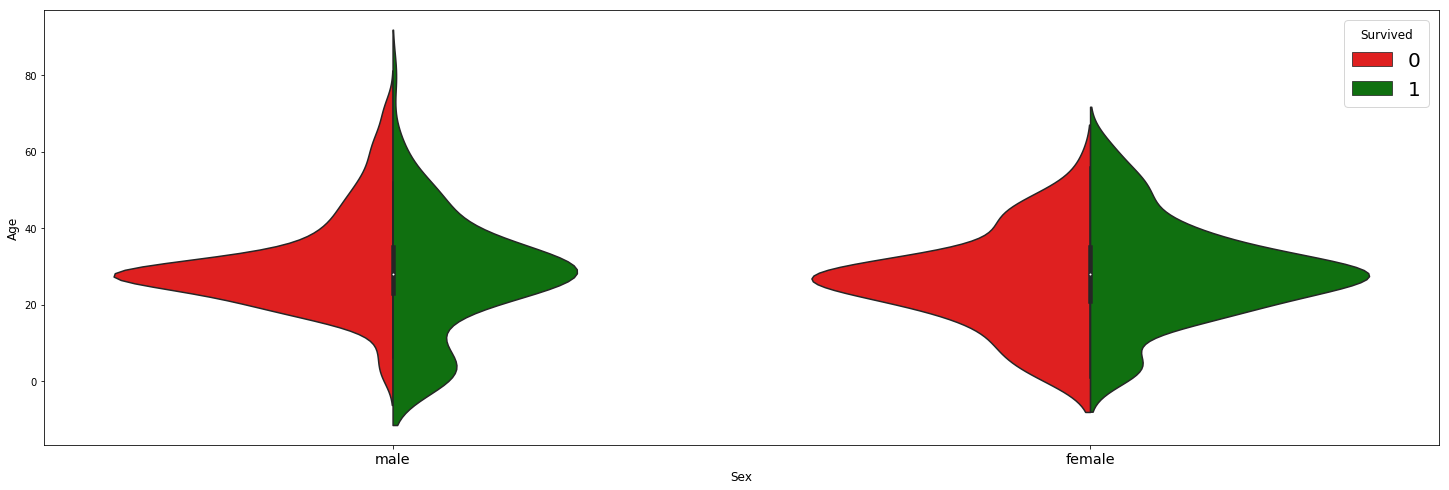

In [13]:
fig = plt.figure(figsize=(25,8))
sns.violinplot(x='Sex',y='Age', hue='Survived', data=train,split=True, palette={0:'r',1:'g'});

From above we can conclude that: 

- Female survive more than Male.
- More number of younger male tend to survive.
- Large number of passengers between the age group of 20 and 40 are succumb.
- Age does not seems to have a direct impact on the female survival.

Now, consider the ticket fare of each passenger. 

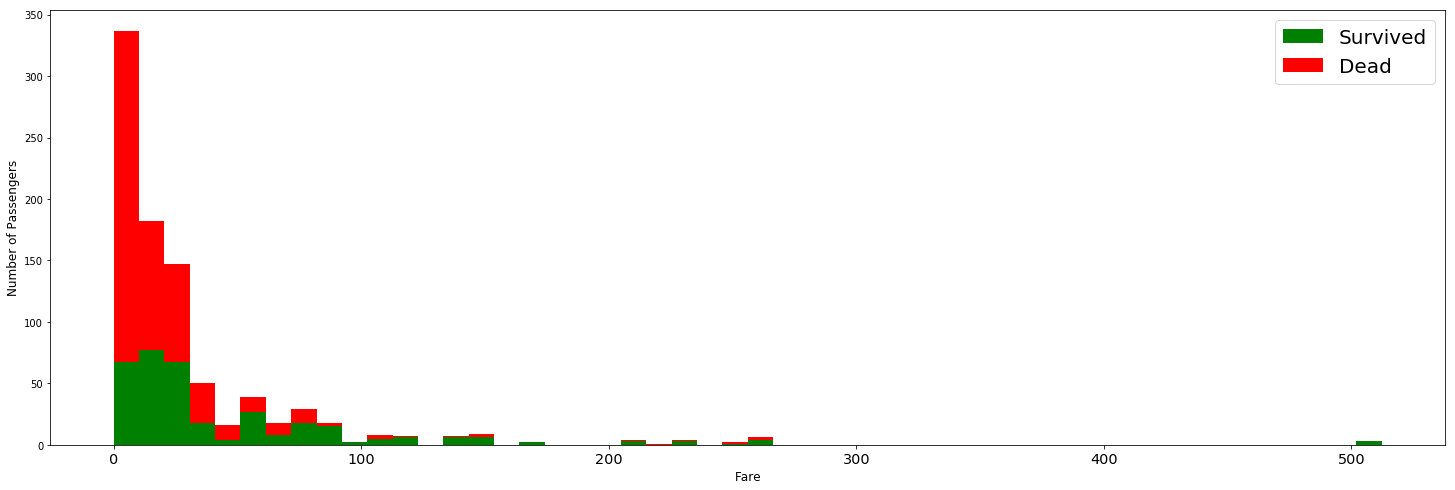

In [14]:
figure = plt.figure(figsize=(25,8))
plt.hist([train[train['Survived']==1]['Fare'],train[train['Survived']==0]['Fare']],
         stacked=True,color=['g','r'],
         bins=50, label=['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend();
        

Here, passengers with cheaper ticket fares are more likely to die 

Now, combine the survival, age and fare on a single chart

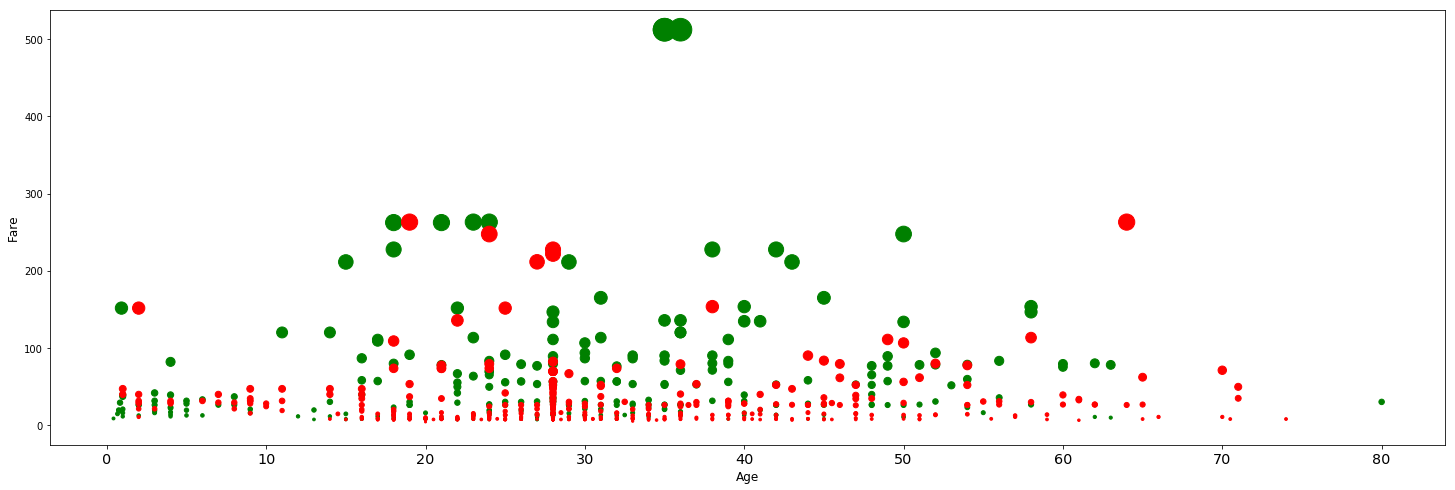

In [15]:
plt.figure(figsize=(25,8))
ax = plt.subplot()

ax.scatter(train[train['Survived']==1]['Age'],train[train['Survived']==1]['Fare'],
          c='g',s=train[train['Survived']==1]['Fare'])

ax.scatter(train[train['Survived']==0]['Age'],train[train['Survived']==0]['Fare'],
          c='r',s=train[train['Survived']==0]['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare');


Here the size of circle is with the proportional to the ticket fare.

From above scatter plot we observe that:
- Small greed dots between x=0 and x=7: these are the children that were saved.
- Small red dots between x=10 and x=45, adults from lower classes on the boat.
- Large green dots between x=20 and x=45: adults with the largest ticket fares.



Now see how the embarkation site affects the survival of passengers.

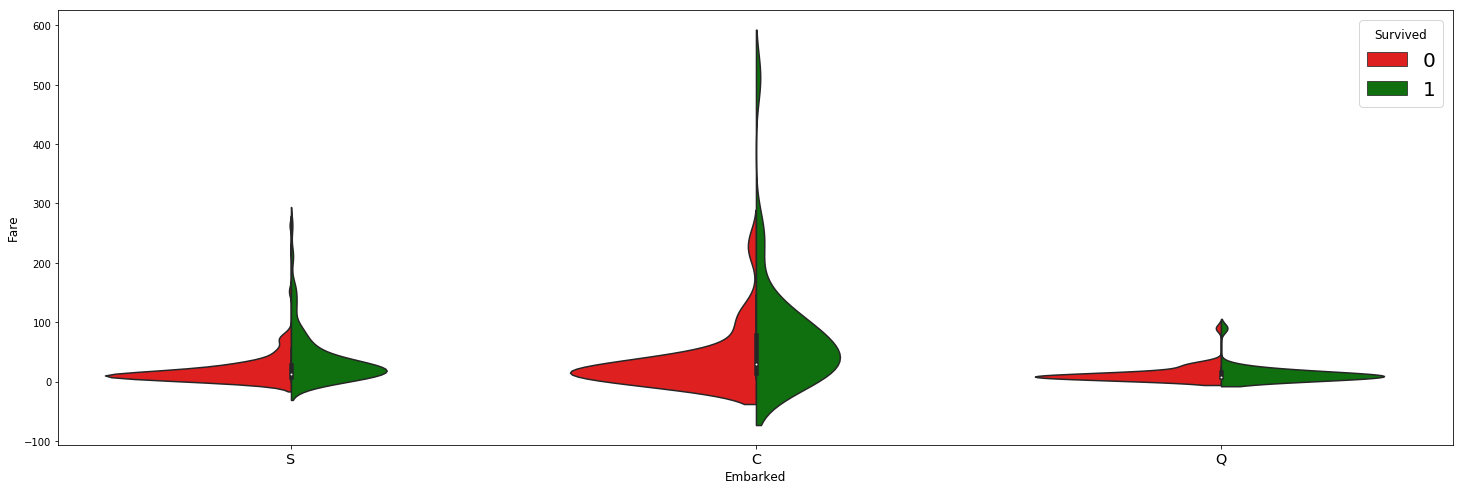

In [16]:
fig=plt.figure(figsize=(25,8))
sns.violinplot(x='Embarked', y='Fare', hue= 'Survived', data = train, split=True, palette={0:'r',1:'g'});

Above plot shows that embarkation C have a wider range of tickets fare and therefore the passengers who pay the highest prices are those who survive.

Now, lets consider the relation between fare and class of the passengers.

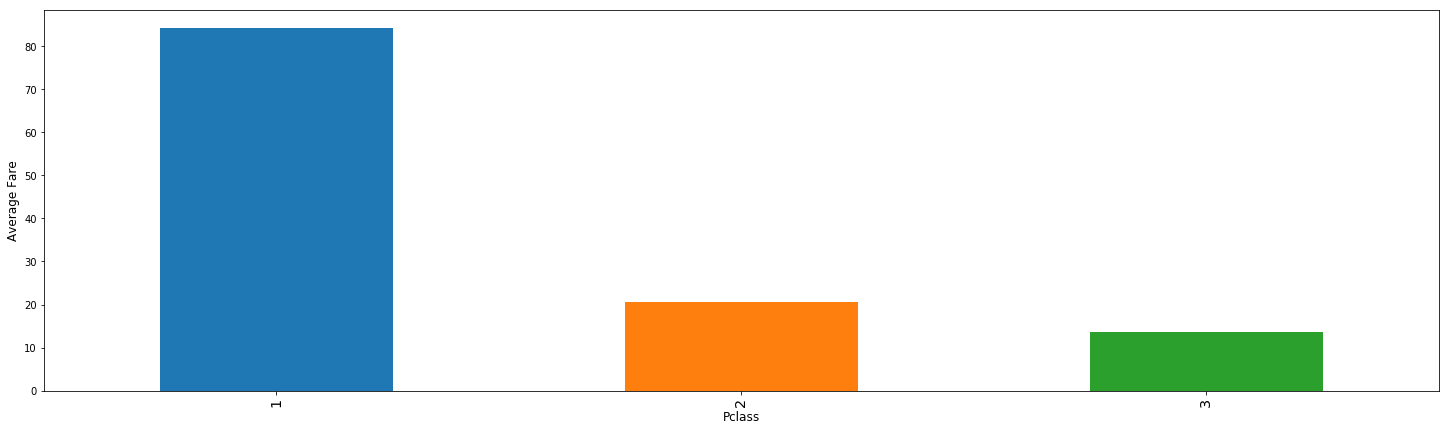

In [17]:
ax= plt.subplot()
ax.set_ylabel('Average Fare')
train.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25,7), ax=ax);


### Feature Engineering :-

In this part we will process the text variables such as passengers name and create additional features which will be usefull in building the model.

Here, we combine the train and test dataset together and drop the Index and PassengerId

In [18]:
def combined_data():
    train=pd.read_csv("train.csv")
    test=pd.read_csv("test.csv")    
    targets= train.Survived
    train.drop(['Survived'],1,inplace=True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis =1)
    return combined

In [19]:
combined = combined_data()

In [20]:
print(combined.shape)

(1309, 10)


In [21]:
combined.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
def process(feature):
    print('Process',feature, 'Done..')

- Title

Here we see that each name has a title in it. So we add the additional information about the social status by simply parsing the name and extracting the title and converting to a binary variable.

In [23]:
titles = set()
for name in train['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Rev', 'Master', 'Mr', 'Miss', 'Don', 'Capt', 'Lady', 'Sir', 'Ms', 'Dr', 'Col', 'Mrs', 'Mme', 'Major', 'Mlle', 'the Countess', 'Jonkheer'}


In [24]:
Title_Dictionary= {
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty",
    "Jonkheer" : "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Ms": "Mrs",
    "Mr" : "Mr"

}

def set_titles():
    combined['Title']= combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    combined['Title'] = combined.Title.map(Title_Dictionary)
    process('Title')
    return combined

In [25]:
combined= set_titles()

Process Title Done..


- Age

In exploratory Data Analysis we have seen that  Age variable was missing 177 values. replacing them with the mean or the median age might not be the best solution since the age may differ by groups and categories of passengers.

In [26]:
# missing ages in train dataset
print(combined.iloc[:891].Age.isnull().sum())

177


In [27]:
#missing ages in train dataset
print(combined.iloc[891:].Age.isnull().sum())
combined.head()

86


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [28]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [29]:
grouped_median_train.head(5)

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


Above dataframe will be used to impute the missing age values based on different criteria

In [30]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    process('Age')
    return combined

In [31]:
combined= process_age()

Process Age Done..


- Names

In [32]:
def process_names():
    global combined
    combined.drop('Name', axis=1, inplace=True)
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    combined.drop('Title', axis=1, inplace=True)
    process('Names')
    return combined

In [33]:
combined = process_names()

Process Names Done..


Above function drops the Name column as we won't be using it anymore because we created a Title column.

- Fares

In [34]:
def process_fares():
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    process('Fare')
    return combined

process_fares() function replaces one missing Fare value by the mean.

In [35]:
combined = process_fares()

Process Fare Done..


- Embarked

In [36]:
def process_embarked():
    global combined
    combined.Embarked.fillna('S', inplace=True) 
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    process('Embarked')
    return combined

In [37]:
combined = process_embarked()

Process Embarked Done..


- Cabin

In [38]:
train_cabin, test_cabin = set(), set()
for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

Here we have replaced missing cabins with U (for Uknown)

In [39]:
print(train_cabin)

{'G', 'B', 'E', 'U', 'F', 'D', 'C', 'T', 'A'}


In [40]:
print(test_cabin)

{'G', 'E', 'U', 'D', 'F', 'B', 'C', 'A'}


In [41]:
def process_cabin():
    global combined    
    combined.Cabin.fillna('U', inplace=True)
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
    combined = pd.concat([combined, cabin_dummies], axis=1)
    combined.drop('Cabin', axis=1, inplace=True)
    process('Cabin')
    return combined

In [42]:
combined =  process_cabin()

Process Cabin Done..


- Sex

In [43]:
def process_sex():
    global combined
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
    process('Sex')
    return combined

maps the string values male and female to 1 and 0 respectively.

In [44]:
combined = process_sex()

Process Sex Done..


- Pclass

In [45]:
def process_pclass():
    
    global combined
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    combined = pd.concat([combined, pclass_dummies],axis=1)
    combined.drop('Pclass',axis=1,inplace=True)
    process('Pclass')
    return combined

In [46]:
combined = process_pclass()

Process Pclass Done..


In [47]:
def clean_Ticket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXXX'

In [48]:
tickets = set()
for tic in combined['Ticket']:
    tickets.add(clean_Ticket(tic))

In [49]:
print( len(tickets))

37


In [50]:
def process_ticket():
    
    global combined
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if (len(ticket)) > 0:
            return ticket[0]
        else: 
            return 'XXXX'
    
    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    process('Ticket')
    return combined

In [51]:
combined = process_ticket()

Process Ticket Done..


In [52]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXXX
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


- Family

This part includes creating new variables based on the size of the family (the size is by the way, another variable we create).

This creation of new variables is done under a realistic assumption: Large families are grouped together, hence they are more likely to get rescued than people traveling alone.

In [53]:
def process_family():
    
    global combined
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    process('family')
    return combined

In [54]:
combined = process_family()

Process family Done..


This function introduces 4 new features:

- FamilySize : the total number of relatives including the passenger (him/her)self.
- Sigleton : a boolean variable that describes families of size = 1
- SmallFamily : a boolean variable that describes families of 2 <= size <= 4
- LargeFamily : a boolean variable that describes families of 5 < size

In [55]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0


We end up with a total of 67 features and not even a single feature contains null value.

### Modeling :-

In this part, we use our knowledge of the passengers based on the features we created and then build a statistical model. You can think of this model as a box that crunches the information of any new passenger and decides whether or not he survives.

We now have to:

1. Break the combined dataset in train set and test set.
2. Use the train set to build a predictive model.
3. Evaluate the model using the train set.
4. Test the model using the test set and generate and output file for the submission.

- Recovering the train set and the test set from the combined dataset.

In [56]:
def recover():
    global combined
    
    targets = pd.read_csv('train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [57]:
train, test, targets = recover()
train.shape, test.shape, targets.shape

((891, 67), (418, 67), (891,))

- Let's start by importing the useful libraries.

In [58]:
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score


c:\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


- Feature selection

In [59]:
features = [columns for columns in train.columns]

In [60]:
def features_GBC_model(clf, train,targets, features):
    clf.fit(train[features], targets)
    probab_of_predict = clf.predict_proba(train[features])[:,1]
    predict_train = clf.predict(train[features])


    cv_score = cross_val_score(clf,train[features], targets, cv = 5, scoring="roc_auc")

    print("----------------------Model performance-----------------------")
    print("Accuracy score: ", accuracy_score(targets, predict_train))
    print("AUC: ", roc_auc_score(targets,probab_of_predict) )
    print("CV score: Mean - {}, Max - {}, Min - {}, Std - {}".format(np.mean(cv_score), np.max(cv_score),
                                                                     np.min(cv_score), np.std(cv_score)))

    Relative_Feature_importance = pd.Series(clf.feature_importances_, features).sort_values(ascending=False)
    Relative_Feature_importance.plot(kind='bar', title='Order of Feature Importance',figsize=(25, 10))
    plt.ylabel('Feature Importance')
    plt.show();

----------------------Model performance-----------------------
Accuracy score:  0.8967452300785634
AUC:  0.9480368346488565
CV score: Mean - 0.8823584178204769, Max - 0.9118996222342148, Min - 0.8247035573122529, Std - 0.03139100679435417


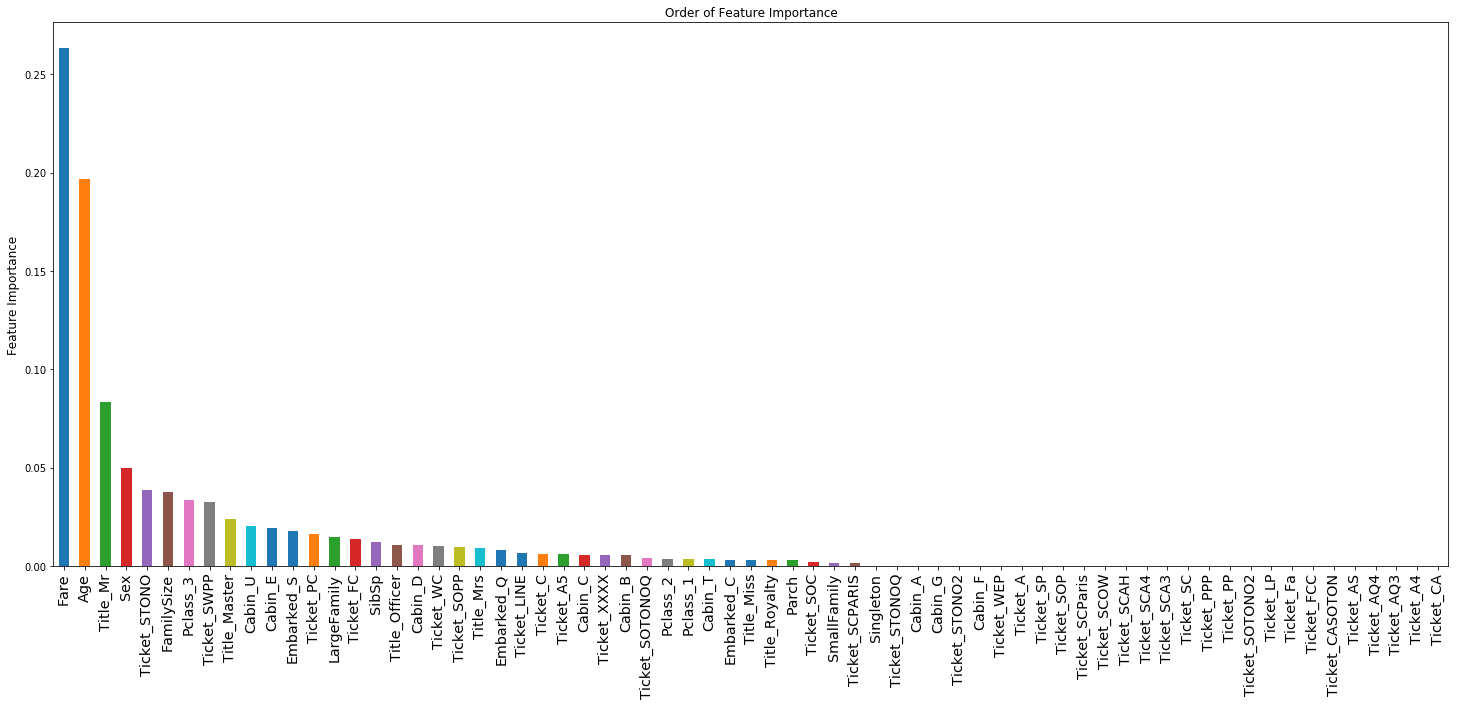

None


In [61]:
clf = GradientBoostingClassifier(random_state=15)
print(features_GBC_model(clf, train,targets, features))

In [62]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [63]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [64]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

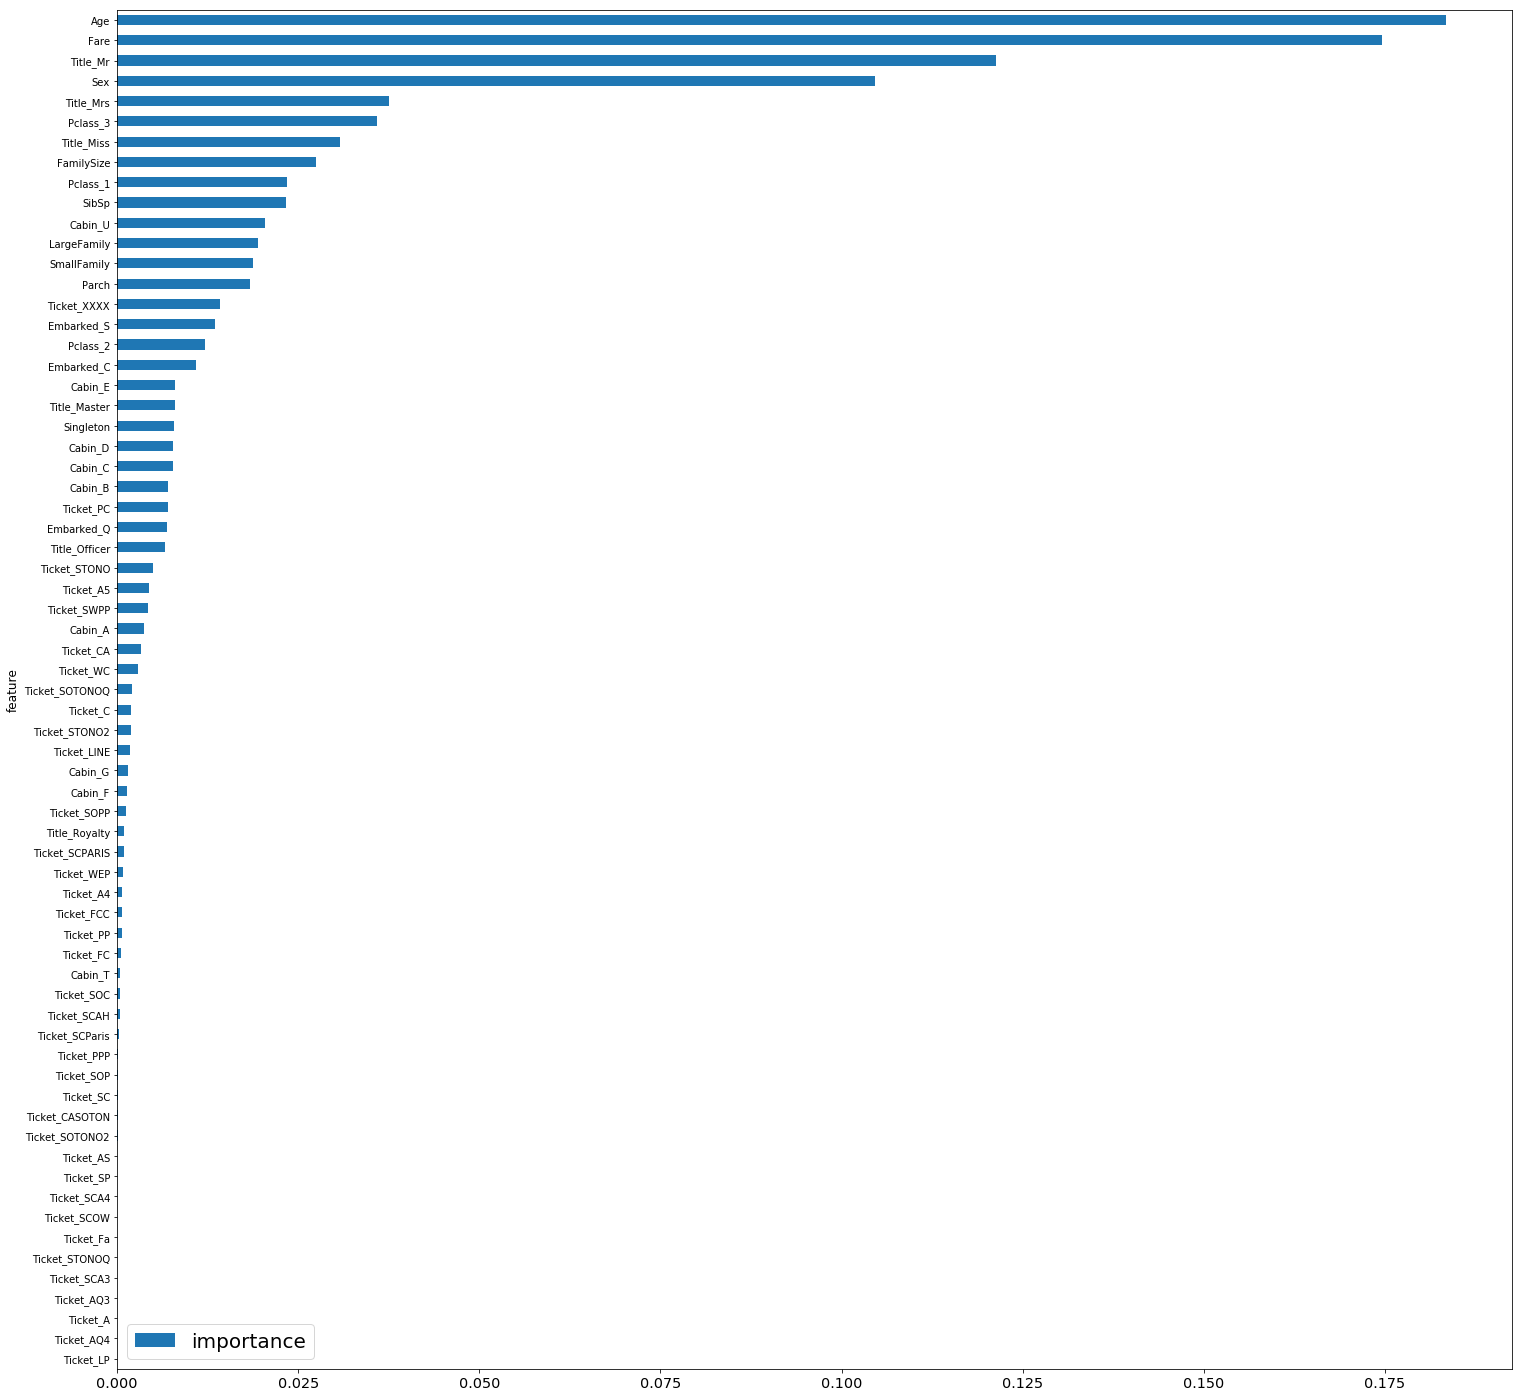

In [65]:
features.plot(kind='barh', figsize=(25, 25));

As you may notice, there is a great importance linked to Title_Mr, Age, Fare, and Sex.

There is also an important correlation with the Passenger_Id.

Let's now transform our train set and test set in a more compact datasets.

##### Let's try different base models

In [66]:
x_train, x_test,y_train, y_test= train_test_split(train, targets,test_size=0.2)

In [67]:
models = [LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB() , LinearDiscriminantAnalysis() , 
        QuadraticDiscriminantAnalysis()]

model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB', 'LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis']

accuracy = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    accuracy.append(accuracy_score(pred , y_test))
    
compare = pd.DataFrame({'Algorithm' : model_names , 'Accuracy' : accuracy})
compare

,Algorithm,Accuracy
0,LogisticRegression,0.832402
1,LinearSVM,0.731844
2,rbfSVM,0.731844
3,KNearestNeighbors,0.720670
4,RandomForestClassifier,0.804469
5,DecisionTree,0.776536
6,GradientBoostingClassifier,0.843575
7,GaussianNB,0.491620
8,LinearDiscriminantAnalysis,0.837989
9,QuadraticDiscriminantAnalysis,0.424581


Here, GradientBoostingClassifier have higher accuracy. So lets start the hyperparameters tuning of this model

In [68]:
estimators = [x for x in range(50,500,20)]
first_tune = {'n_estimators': estimators}
first_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,min_samples_split=400,
                                                                 min_samples_leaf=70,
                                                                 max_depth=8,max_features='sqrt',subsample=0.8, 
                                                                 random_state=15, 
                                                                 )
                   , param_grid=first_tune,scoring='roc_auc', n_jobs=6, iid=False, cv=5)

first_search.fit(train,targets)

print(first_search.grid_scores_ , first_search.best_params_, first_search.best_score_)

[mean: 0.85335, std: 0.01450, params: {'n_estimators': 50}, mean: 0.85510, std: 0.01630, params: {'n_estimators': 70}, mean: 0.85637, std: 0.01739, params: {'n_estimators': 90}, mean: 0.85752, std: 0.01695, params: {'n_estimators': 110}, mean: 0.85899, std: 0.01707, params: {'n_estimators': 130}, mean: 0.85947, std: 0.01723, params: {'n_estimators': 150}, mean: 0.86036, std: 0.01699, params: {'n_estimators': 170}, mean: 0.86098, std: 0.01798, params: {'n_estimators': 190}, mean: 0.86091, std: 0.01833, params: {'n_estimators': 210}, mean: 0.86227, std: 0.01782, params: {'n_estimators': 230}, mean: 0.86207, std: 0.01804, params: {'n_estimators': 250}, mean: 0.86237, std: 0.01748, params: {'n_estimators': 270}, mean: 0.86267, std: 0.01871, params: {'n_estimators': 290}, mean: 0.86355, std: 0.01932, params: {'n_estimators': 310}, mean: 0.86320, std: 0.02039, params: {'n_estimators': 330}, mean: 0.86379, std: 0.02068, params: {'n_estimators': 350}, mean: 0.86474, std: 0.02086, params: {'n_e

c:\python36\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Here we get n_estimators value as 410

In [69]:
min_split = [x for x in range(100,1101,100)]
depth = [x for x in range(5,15,1)]
second_tune = {'max_depth':depth, 'min_samples_split':min_split}
second_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,n_estimators = 410,
                                                                  min_samples_split=400,
                                                                 min_samples_leaf=70,
                                                                  max_depth=8,max_features='sqrt',subsample=0.8, 
                                                                 random_state=15
                                                                 )
                   , param_grid=second_tune,scoring='roc_auc', n_jobs=6, iid=False, cv=5)

second_search.fit(train,targets)

print(second_search.grid_scores_ , second_search.best_params_, second_search.best_score_)

[mean: 0.87586, std: 0.02625, params: {'max_depth': 5, 'min_samples_split': 100}, mean: 0.87421, std: 0.02625, params: {'max_depth': 5, 'min_samples_split': 200}, mean: 0.86819, std: 0.02415, params: {'max_depth': 5, 'min_samples_split': 300}, mean: 0.86532, std: 0.02120, params: {'max_depth': 5, 'min_samples_split': 400}, mean: 0.86322, std: 0.01872, params: {'max_depth': 5, 'min_samples_split': 500}, mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 600}, mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 700}, mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 800}, mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 900}, mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 1000}, mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 1100}, mean: 0.87589, std: 0.02624, params: {'max_depth': 6, 'min_samples_split': 100}, mean: 0.87421, std: 0.026

c:\python36\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


We get max_depth: 6, min_samples_split: 100, as well as increases the performance of model.

In [70]:
min_sample_leaf = [x for x in range(20,200,10)]
third_tune = {'min_samples_leaf':min_sample_leaf}
third_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,n_estimators = 410,
                                                                  min_samples_split=100,
                                                                 min_samples_leaf=50,
                                                                 max_depth=6,max_features='sqrt',subsample=0.8, 
                                                                 random_state=15, 
                                                                 )
                   , param_grid=third_tune,scoring='roc_auc', n_jobs=6, iid=False, cv=5)

third_search.fit(train, targets)

print(third_search.grid_scores_ , third_search.best_params_, third_search.best_score_)

[mean: 0.87534, std: 0.03039, params: {'min_samples_leaf': 20}, mean: 0.87772, std: 0.02932, params: {'min_samples_leaf': 30}, mean: 0.87653, std: 0.02933, params: {'min_samples_leaf': 40}, mean: 0.87547, std: 0.02949, params: {'min_samples_leaf': 50}, mean: 0.87700, std: 0.02756, params: {'min_samples_leaf': 60}, mean: 0.87589, std: 0.02624, params: {'min_samples_leaf': 70}, mean: 0.87384, std: 0.02598, params: {'min_samples_leaf': 80}, mean: 0.87131, std: 0.02544, params: {'min_samples_leaf': 90}, mean: 0.87012, std: 0.02624, params: {'min_samples_leaf': 100}, mean: 0.86664, std: 0.02421, params: {'min_samples_leaf': 110}, mean: 0.86513, std: 0.02162, params: {'min_samples_leaf': 120}, mean: 0.86430, std: 0.02159, params: {'min_samples_leaf': 130}, mean: 0.86296, std: 0.02182, params: {'min_samples_leaf': 140}, mean: 0.86012, std: 0.02045, params: {'min_samples_leaf': 150}, mean: 0.86182, std: 0.01796, params: {'min_samples_leaf': 160}, mean: 0.85869, std: 0.01826, params: {'min_samp

c:\python36\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Performance is increasing on every Grid Search. Now min_sample_leaf will be 30.

In [71]:
max_feat = [x for x in range(10,29,2)]
fourth_tune = {'max_features':max_feat}
fourth_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,n_estimators = 410,
                                                                  min_samples_split=100,
                                                                 min_samples_leaf=30,
                                                                 max_depth=6,max_features='sqrt',subsample=0.8, 
                                                                 random_state=15, 
                                                                 )
                   , param_grid=fourth_tune,scoring='roc_auc', n_jobs=6, iid=False, cv=5)

fourth_search.fit(train,targets)

print(fourth_search.grid_scores_ , fourth_search.best_params_, fourth_search.best_score_)

[mean: 0.87636, std: 0.03174, params: {'max_features': 10}, mean: 0.87856, std: 0.02970, params: {'max_features': 12}, mean: 0.87812, std: 0.03055, params: {'max_features': 14}, mean: 0.88043, std: 0.03055, params: {'max_features': 16}, mean: 0.88104, std: 0.02833, params: {'max_features': 18}, mean: 0.88126, std: 0.03113, params: {'max_features': 20}, mean: 0.88066, std: 0.02996, params: {'max_features': 22}, mean: 0.88154, std: 0.03037, params: {'max_features': 24}, mean: 0.88047, std: 0.02909, params: {'max_features': 26}, mean: 0.88136, std: 0.02864, params: {'max_features': 28}] {'max_features': 24} 0.8815449717617764


c:\python36\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [72]:
sub_sample = [0.5,0.55,0.6,0.65,0.7,0.75,0.8]
fifth_tune = {'subsample': sub_sample}
fifth_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,n_estimators = 410,
                                                                  min_samples_split=100,
                                                                 min_samples_leaf=30,
                                                                 max_depth=6,max_features=24,subsample=0.8, 
                                                                 random_state=15, 
                                                                 )
                   ,param_grid=fifth_tune,scoring='roc_auc', n_jobs=6, iid=False, cv=5)

fifth_search.fit(train, targets)

print(fifth_search.grid_scores_ , fifth_search.best_params_, fifth_search.best_score_)

[mean: 0.87834, std: 0.02821, params: {'subsample': 0.5}, mean: 0.87959, std: 0.03188, params: {'subsample': 0.55}, mean: 0.87811, std: 0.03057, params: {'subsample': 0.6}, mean: 0.87866, std: 0.02779, params: {'subsample': 0.65}, mean: 0.88225, std: 0.02814, params: {'subsample': 0.7}, mean: 0.88286, std: 0.02968, params: {'subsample': 0.75}, mean: 0.88154, std: 0.03037, params: {'subsample': 0.8}] {'subsample': 0.75} 0.8828584953218332


c:\python36\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Finally got approax 88% accuracy.
Now lets get the prediction of test dataset.

In [73]:
model = GradientBoostingClassifier(learning_rate=0.05,n_estimators = 410,min_samples_split=100,min_samples_leaf=30,
                                max_depth=6,random_state=15,max_features=24,subsample=0.75 )
model.fit(train,targets)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=24, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=100,
              min_weight_fraction_leaf=0.0, n_estimators=410,
              presort='auto', random_state=15, subsample=0.75, verbose=0,
              warm_start=False)

In [74]:
output = clf.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('submission.csv', index=False)